<a href="https://colab.research.google.com/github/shivam-sunita-puri/TIYA/blob/main/Fitbit_download_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import requests
import pprint

client_id = '23PQP9'
client_secret = '4e6963757b523332bf8207294bb209f2'
redirect_uri = 'https://brainhack-aus.github.io/global2024/'

# Step 1: Direct user to authorize URL
authorization_url = f"https://www.fitbit.com/oauth2/authorize?response_type=code&client_id={client_id}&redirect_uri={redirect_uri}&scope=activity%20sleep%20heartrate"
print("Visit this URL to authorize:", authorization_url)

# Step 2: Get access token after authorization
# Once the user grants access, you will get a code in the redirect URI. Use it to obtain the token.


Visit this URL to authorize: https://www.fitbit.com/oauth2/authorize?response_type=code&client_id=23PQP9&redirect_uri=https://brainhack-aus.github.io/global2024/&scope=activity%20sleep%20heartrate


In [ ]:
# Substitute XXX below with code received
code = 'XXX'

# Token endpoint for Fitbit
token_url = "https://api.fitbit.com/oauth2/token"

# Set up the payload for requesting tokens
payload = {
    'client_id': client_id,
    'grant_type': 'authorization_code',
    'redirect_uri': redirect_uri,
    'code': code
}

## HTTPBasicAuth

# Send the POST request to exchange the authorization code for tokens
response = requests.post(token_url, data=payload, auth=(client_id, client_secret))

# Check if the request was successful
if response.status_code == 200:
    tokens = response.json()
    access_token = tokens['access_token']
    refresh_token = tokens['refresh_token']
    print("Access Token:", access_token)
    print("Refresh Token:", refresh_token)
else:
    print("Failed to obtain tokens:", response.status_code, response.text)

In [ ]:
# Substitute YYY below with token received
access_token='YYY'

headers = {'Authorization': f'Bearer {access_token}'}

url = "https://api.fitbit.com/1/user/-/activities/heart/date/today/1d/1sec.json"  # Replace date as needed

#url = "https://api.fitbit.com/1/user/-/activities/heart/date/2024-11-04/2024-11-04/1min/time/10:00/10:30.json"

#url = "https://api.fitbit.com/1/user/-/activities/heart/date/2024-11-04/2024-11-04/15min.json"


response = requests.get(url, headers=headers)
data = response.json()

pprint.pprint(data)


In [ ]:
print(data['activities-heart-intraday']['dataset'])

In [73]:
import csv

# Specify the file name
filename = "heart_rate_data.csv"

# Writing to CSV file
with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["time", "value"])

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(data['activities-heart-intraday']['dataset'])

print(f"Data saved to {filename}")


Data saved to heart_rate_data.csv


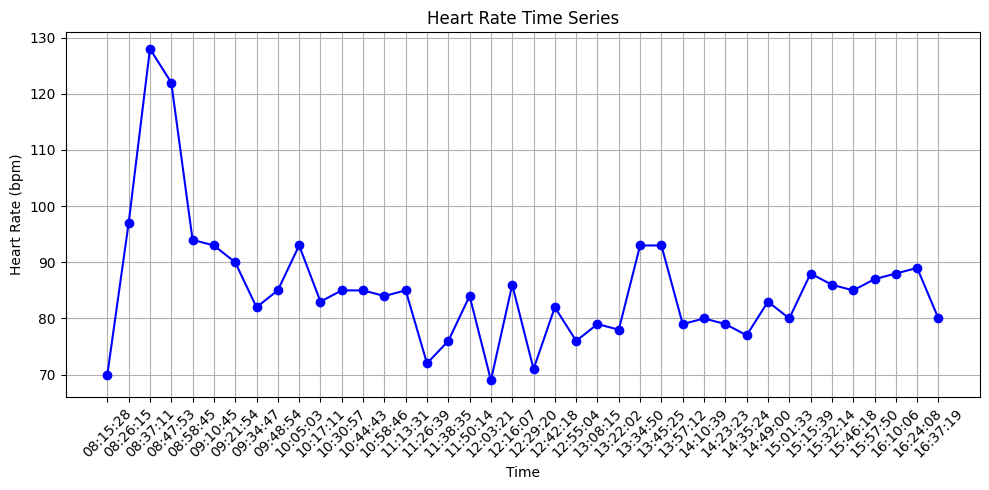

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert the data into a DataFrame
df = pd.DataFrame(data['activities-heart-intraday']['dataset'][::100])

# Set the datetime column as the index
df.set_index('time', inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['value'], marker='o', linestyle='-', color='b')
plt.title('Heart Rate Time Series')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust the layout to prevent clipping of ylabel
plt.show()
